In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("../01_create/" + "240103_lp_data_with_sc_and_rec_usage.csv")
data = data.sort_values(by=['pool_addr', 'liquidity_provider', 'week'])
price_info = pd.read_csv("../01_create/" + "240103_weekly_pool_agg_results.csv")
def qtile_25(x):
    return x.quantile(0.25)
def qtile_75(x):
    return x.quantile(0.75)
def qtile_10(x):
    return x.quantile(0.10)
def qtile_90(x):
    return x.quantile(0.90)

In [24]:
sc_conditions_list = [
    data['sc_usage_avg'] == 0,
    data['sc_usage_avg'] == 1,
]
sc_choice_list = [
    'no_sc',
    'full_sc',
]
data['sc_type'] = np.select(sc_conditions_list, sc_choice_list, default='mixed')

rec_conditions_list = [
    (data['rec_usage_avg'] == 0),
    (data['rec_usage_avg'] == 1),
]
rec_choice_list = [
    'no_rec',
    'full_rec',
]
data['rec_type'] = np.select(rec_conditions_list, rec_choice_list, default='mixed')

In [25]:
# sort data
data.sort_values(by=["pool_addr", "liquidity_provider", "week"], inplace=True)

In [26]:
data["sc_type_lag"] = data.groupby(["pool_addr", "liquidity_provider"])["sc_type"].shift(1)
data["rec_type_lag"] = data.groupby(["pool_addr", "liquidity_provider"])["rec_type"].shift(1)

In [27]:
# filter out na for now
data_two_weeks = data.dropna().copy()

In [28]:
data_two_weeks["sc_type_lag_changed"] = data_two_weeks["sc_type_lag"] != data_two_weeks["sc_type"]
data_two_weeks["rec_type_lag_changed"] = data_two_weeks["rec_type_lag"] != data_two_weeks["rec_type"]

In [29]:
data_two_weeks[data_two_weeks["sc_type_lag_changed"]]

,pool_addr,liquidity_provider,week,overall_roi,amt_roi,fee_roi,fee,amt,amt_last,amount_input,...,active_perc,sc_usage_avg,rec_usage_avg,lp_type,sc_type,rec_type,sc_type_lag,rec_type_lag,sc_type_lag_changed,rec_type_lag_changed
2851,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x04248fe487910f21fa3be187fc84b0873d1ff1af,2022-03-06,0.998295,0.994454,0.003841,27.057758,7005.717312,7044.785988,5296.425205,...,0.712285,0.708333,0.291667,sc_only,mixed,mixed,full_sc,no_rec,True,True
2854,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x04248fe487910f21fa3be187fc84b0873d1ff1af,2022-03-27,1.039530,1.036942,0.002588,0.005608,2.246727,2.166685,0.000000,...,1.000000,0.000000,1.000000,rec_only,no_sc,full_rec,mixed,mixed,True,True
2855,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x04248fe487910f21fa3be187fc84b0873d1ff1af,2022-04-03,1.001066,1.000062,0.001004,1.996501,1988.890031,1988.767366,1986.520639,...,1.000000,0.300000,0.700000,sc_only,mixed,mixed,no_sc,full_rec,True,True
2857,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x04248fe487910f21fa3be187fc84b0873d1ff1af,2022-04-17,0.985719,0.983692,0.002027,0.004351,2.111963,2.146975,0.000000,...,1.000000,0.000000,1.000000,rec_only,no_sc,full_rec,mixed,mixed,True,True
2859,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x04248fe487910f21fa3be187fc84b0873d1ff1af,2022-05-01,0.973823,0.971857,0.001966,4.485805,2217.329452,2281.539137,2279.496194,...,0.666667,0.363636,0.636364,sc_only,mixed,mixed,no_sc,full_rec,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894245,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfe293b421756739abfdd4ea489b27c337baaa11c,2021-07-11,0.946631,0.940001,0.006630,1903.173665,269834.357104,287057.513465,70054.098490,...,0.549122,0.400000,0.000000,sc_only,mixed,no_rec,no_sc,no_rec,True,False
894269,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfe293b421756739abfdd4ea489b27c337baaa11c,2021-12-26,0.916839,0.916839,0.000000,0.000000,242301.664422,264279.381096,0.000000,...,0.000000,0.000000,0.000000,manual_only,no_sc,no_rec,mixed,no_rec,True,False
895300,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfe82578cd7a7fc7e92cb840f7f1c2a88f49ddc0e,2022-05-08,0.947221,0.934153,0.013068,154.832843,11068.091471,11848.263698,8833.454067,...,0.706045,0.695652,0.304348,sc_only,mixed,mixed,full_sc,no_rec,True,True
895303,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfe82578cd7a7fc7e92cb840f7f1c2a88f49ddc0e,2022-05-29,1.006298,1.001846,0.004451,0.070219,15.803632,15.774508,0.000000,...,1.000000,0.000000,1.000000,rec_only,no_sc,full_rec,mixed,mixed,True,True


In [30]:
data_two_weeks["from_rec_to_non_rec"] = (data_two_weeks["rec_type_lag"] == 'full_rec') & (data_two_weeks["rec_type"] == 'no_rec')

In [31]:
lps = data_two_weeks[data_two_weeks["from_rec_to_non_rec"]]["liquidity_provider"].unique()

In [32]:
data_for_lps = data_two_weeks[data_two_weeks["liquidity_provider"].isin(lps)].copy()

In [51]:
data_for_lps["after_change"] = data_two_weeks.groupby(["pool_addr", "liquidity_provider"])["from_rec_to_non_rec"].cumsum()

In [55]:
data_for_lps["after_change_binary"] =  data_for_lps["after_change"] > 0

In [58]:
res_temp_by_group = data_for_lps.groupby(["week", "after_change_binary"])["overall_roi"].median().reset_index()

In [53]:
res_temp_by_group

,week,after_change,overall_roi
0,2021-05-30,0,1.020683
1,2021-06-06,0,0.973221
2,2021-06-13,0,0.915384
3,2021-06-20,0,0.929408
4,2021-06-27,0,1.135277
...,...,...,...
156,2022-12-11,1,0.960562
157,2022-12-18,0,1.019450
158,2022-12-18,1,1.021125
159,2022-12-25,0,0.984638


In [45]:
res_temp_by_group_temp = res_temp_by_group[res_temp_by_group["rec_type"] != 'mixed'].copy()

In [46]:
res_temp_by_group_temp["week"] = pd.to_datetime(res_temp_by_group_temp["week"])

In [47]:
import seaborn as sns

In [50]:
data_two_weeks[data_two_weeks["from_rec_to_non_rec"]]

,pool_addr,liquidity_provider,week,overall_roi,amt_roi,fee_roi,fee,amt,amt_last,amount_input,...,sc_usage_avg,rec_usage_avg,lp_type,sc_type,rec_type,sc_type_lag,rec_type_lag,sc_type_lag_changed,rec_type_lag_changed,from_rec_to_non_rec
27361,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x2922565e94160a1574952b3e79b305f43280e778,2022-09-25,0.991878,0.989505,0.002374,341.589844,1.424000e+05,1.439104e+05,1.439104e+05,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True
43566,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x41563214da234a47b6b4f8af61df7c29728b9667,2022-09-18,1.014164,0.997993,0.016171,0.687702,4.244198e+01,4.252732e+01,4.252732e+01,...,1.0,0.0,sc_only,full_sc,no_rec,full_sc,full_rec,False,True,True
63877,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x610000a7ec86897b92b1af7c982aeb1ea90fb2d4,2022-07-10,1.086556,1.085338,0.001218,2.083896,1.857063e+03,1.711045e+03,1.711045e+03,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True
82652,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0x7c64099a60cf95e9f50b977636add24c23384bc1,2021-08-08,1.009684,1.009286,0.000398,3817.572283,9.676098e+06,9.587076e+06,9.587076e+06,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True
110596,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0xa5d223c176daab154a3134369d1c0478c5e6fecf,2022-02-27,1.012852,1.008270,0.004582,25389.355796,5.587311e+06,5.541481e+06,5.541481e+06,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863246,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf398d6f2aa31a2e2e66173023f5a82ffef6278e0,2022-03-06,0.958859,0.957444,0.001415,101.483312,6.864901e+04,7.170029e+04,7.170029e+04,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True
864952,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf45f650ba6829f0f1d2a1d80d21e8a41f692b48a,2021-11-28,0.997052,0.997052,0.000000,0.000000,8.471178e+04,8.496226e+04,8.496226e+04,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True
864963,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xf45f650ba6829f0f1d2a1d80d21e8a41f692b48a,2022-06-19,1.070291,1.065224,0.005067,48.443680,1.018475e+04,9.561136e+03,9.561136e+03,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True
882876,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfa054eec986c46d368131f60cf1385071aba85d3,2022-10-16,1.005451,1.002887,0.002564,6.570529,2.570130e+03,2.562731e+03,2.562731e+03,...,0.0,0.0,manual_only,no_sc,no_rec,no_sc,full_rec,False,True,True


<Axes: xlabel='week', ylabel='overall_roi'>

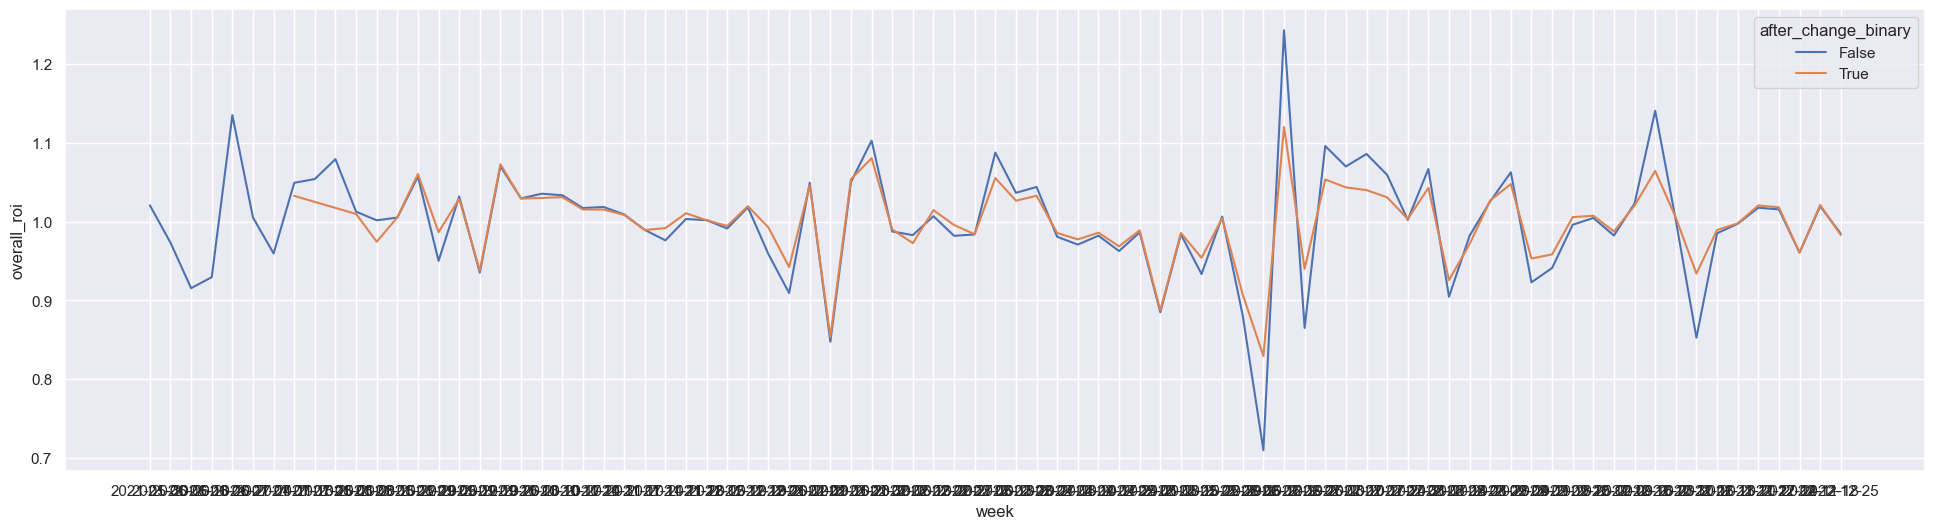

In [57]:
sns.set(rc={'figure.figsize':(24,6)})
sns.lineplot(res_temp_by_group, x='week', y='overall_roi', hue='after_change_binary')

<Axes: xlabel='week', ylabel='overall_roi'>

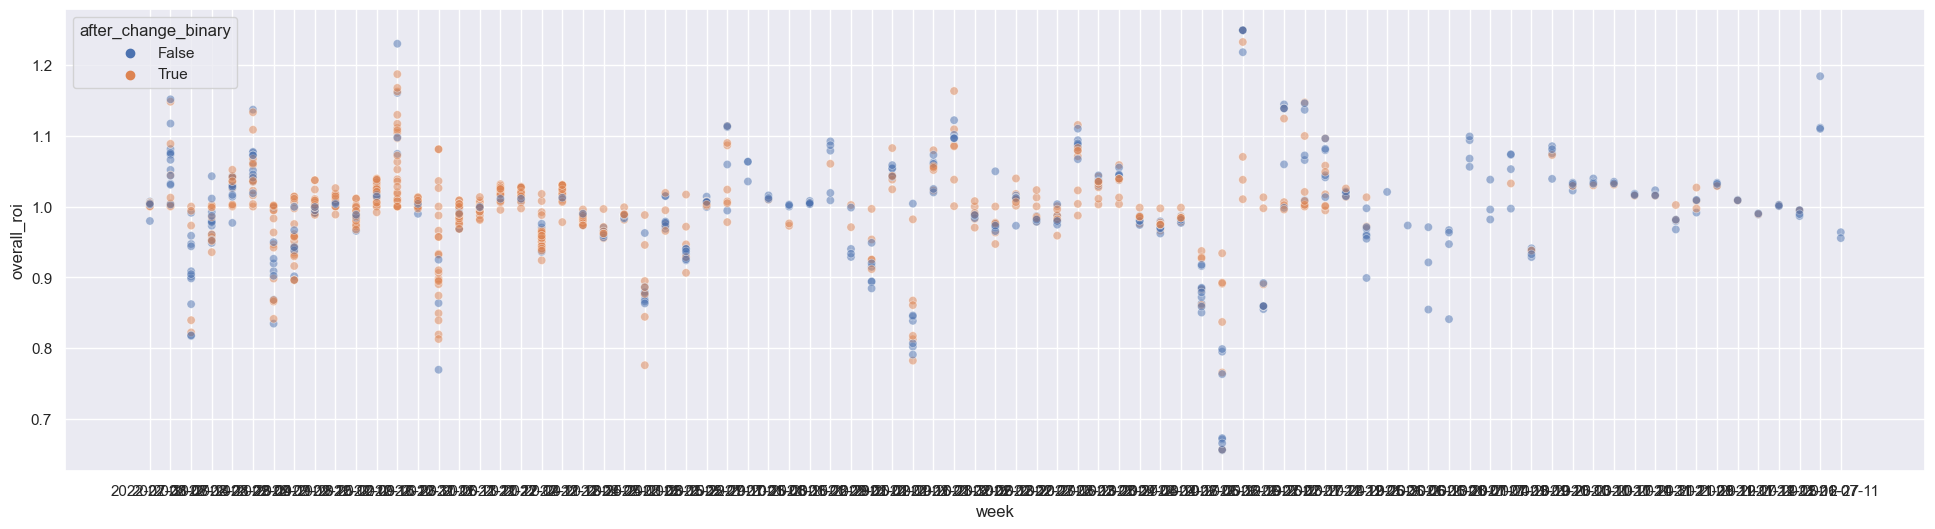

In [60]:
sns.scatterplot(data_for_lps, x='week', y='overall_roi', hue='after_change_binary', alpha=0.5)